In [206]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 10]
np.set_printoptions(precision=3)

plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [207]:
df = pd.read_csv('./NHIS_OPEN_GJ_2018_100.csv')

In [208]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.50000,1.50000,1.50000,1.00000,1.00000,110.00000,60.00000,96.00000,nan,nan,nan,nan,12.80000,1.00000,0.50000,21.00000,8.00000,12.00000,1.00000,nan,0,nan,nan,nan,nan,nan,20191219
1,2018,2,1,6,26,170,55,69.30000,1.20000,0.80000,1.00000,1.00000,128.00000,78.00000,79.00000,nan,nan,nan,nan,15.90000,1.00000,1.00000,35.00000,45.00000,47.00000,1.00000,1.00000,1,0.00000,nan,nan,nan,0.00000,20191219
2,2018,3,1,12,28,165,70,85.00000,0.80000,0.80000,2.00000,1.00000,128.00000,65.00000,80.00000,nan,nan,nan,nan,12.50000,nan,1.10000,77.00000,47.00000,21.00000,2.00000,1.00000,1,0.00000,nan,nan,nan,0.00000,20191219
3,2018,4,2,15,27,150,45,71.50000,0.40000,0.30000,1.00000,1.00000,151.00000,89.00000,100.00000,234.00000,90.00000,80.00000,135.00000,12.70000,1.00000,0.60000,19.00000,10.00000,13.00000,1.00000,nan,1,0.00000,nan,nan,nan,0.00000,20191219
4,2018,5,2,14,41,145,50,77.00000,0.70000,0.60000,1.00000,1.00000,114.00000,62.00000,124.00000,nan,nan,nan,nan,11.60000,1.00000,0.50000,26.00000,26.00000,12.00000,1.00000,1.00000,0,nan,nan,nan,nan,nan,20191219


In [209]:
df = df.drop(['기준년도','가입자일련번호','시도코드','데이터공개일자','시력(좌)','시력(우)','청력(좌)','청력(우)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','구강검진수검여부','치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석'],axis=1)
df["음주여부"] = df["음주여부"].fillna(value=0)
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)','요단백','음주여부','흡연상태']) #결측치있는행 모두제거
df

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부
0,2,7,160,60,79.50000,110.00000,60.00000,96.00000,1.00000,1.00000,0.00000
1,1,6,170,55,69.30000,128.00000,78.00000,79.00000,1.00000,1.00000,1.00000
3,2,15,150,45,71.50000,151.00000,89.00000,100.00000,1.00000,1.00000,0.00000
4,2,14,145,50,77.00000,114.00000,62.00000,124.00000,1.00000,1.00000,1.00000
5,2,12,155,50,75.00000,136.00000,83.00000,97.00000,1.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...
999995,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,1.00000,0.00000
999996,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,1.00000
999997,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,2.00000,1.00000
999998,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,2.00000,0.00000


In [210]:
df = df.loc[df["허리둘레"] >= 40] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] <= 140]
df['허리둘레'].value_counts().sort_index()

40.00000     1
44.00000     1
48.00000     1
48.10000     1
49.00000     1
            ..
134.00000    1
135.00000    4
136.00000    1
139.00000    1
140.00000    1
Name: 허리둘레, Length: 734, dtype: int64

In [211]:
df.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
요단백            0
흡연상태           0
음주여부           0
dtype: int64

In [212]:
obesity = df[['성별코드','허리둘레']].copy() 
obesity["복부비만"] = 0
obesity.loc[(obesity['성별코드'] == 1) & (obesity['허리둘레'] >= 90),'복부비만'] = 1
obesity.loc[(obesity['성별코드'] == 2) & (obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = obesity["복부비만"] #복부비만 컬럼 추가

weight = df[['신장(5Cm단위)', '체중(5Kg단위)']].copy()

weight['BMI'] = weight['체중(5Kg단위)'] / ( (weight['신장(5Cm단위)'] / 100) * (weight['신장(5Cm단위)']/100) )

df['BMI'] = weight['BMI'] #bmi컬럼 추가

bmi = df['BMI'].copy()
def bmi_code(x):
    if(x >= 30):
        return 2
    elif(25 <= x < 30):
        return 1
    else:
        return 0

bmi = bmi.apply(bmi_code)
df["BMI코드"] = bmi #bmi코드 컬럼 추가


blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] < 80),'고혈압'] = 0
blood_pressure.loc[(80 <= blood_pressure['이완기혈압']) ,'고혈압'] = 1
blood_pressure.loc[(90 <= blood_pressure['이완기혈압']) & (blood_pressure['이완기혈압'] < 100),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 100),'고혈압'] = 3

blood_pressure.loc[blood_pressure['수축기혈압'] < 120,'고혈압'] = 0
blood_pressure.loc[(120 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 140),'고혈압'] = 1
blood_pressure.loc[(140 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 160),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['수축기혈압'] >= 160),'고혈압'] = 3
df["고혈압"] = blood_pressure["고혈압"] #고혈압 컬럼 추가


diabete = df["식전혈당(공복혈당)"].copy()

def is_diabete(x):
    if(x >= 126):
        return 2
    elif((x >= 100) & (x < 126)):
        return 1
    else:
        return 0

diabete = diabete.apply(is_diabete)
df["당뇨병"] = diabete #당뇨병 컬럼 추가

df.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '복부비만', 'BMI', 'BMI코드',
       '고혈압', '당뇨병'],
      dtype='object')

In [213]:
#데이터 세트에서 최고의 특성 4 개를 선택하기 위해 음이 아닌 특성에 대한 카이 제곱 통계 테스트를 구현
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df.values
X = array[:,0:15]
Y = array[:,15]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
fit.scores_

array([   3331.372,   43318.919,     588.247,   69090.094,   74644.319,
         81552.346,   35408.42 , 3713761.956,    1892.548,    3987.101,
           311.054,   23277.383,   22118.424,   25010.026,   28151.594])

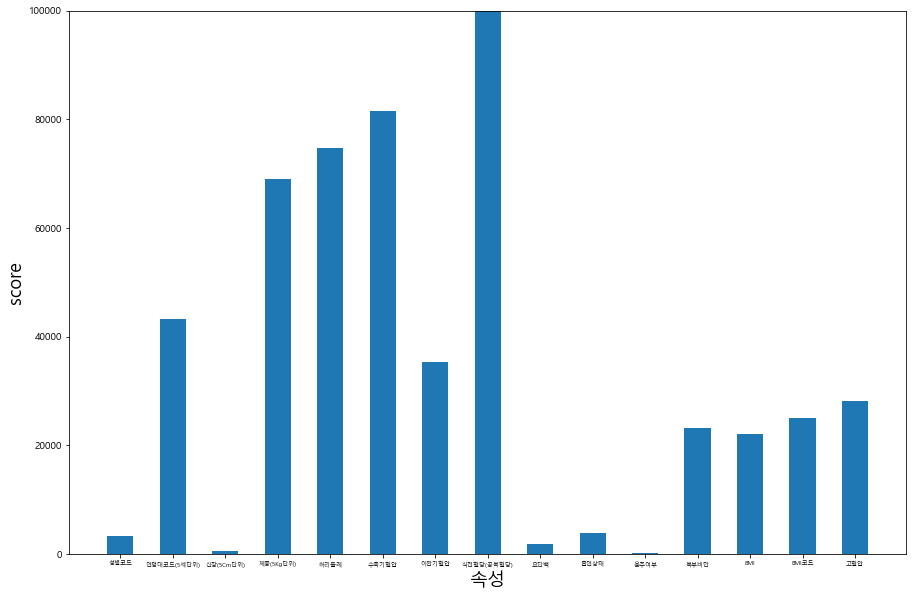

In [214]:
label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '복부비만', 'BMI', 'BMI코드',
       '고혈압'])
index = np.arange(len(label))


plt.bar(index, fit.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.ylim(0, 100000)
plt.show()

In [222]:
#Logistic Regression분류기 와 함께 RFE를 사용 하여 
#모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식
#오래걸림 안돌아감
"""
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,0:15]
Y = array[:,15]

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
"""

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\n\narray = df.values\nX = array[:,0:15]\nY = array[:,15]\n\nmodel = LogisticRegression(max_iter=5000)\nrfe = RFE(model, 5)\nfit = rfe.fit(X, Y)\nprint("Num Features: %s" % (fit.n_features_))\nprint("Selected Features: %s" % (fit.support_))\nprint("Feature Ranking: %s" % (fit.ranking_))\n'

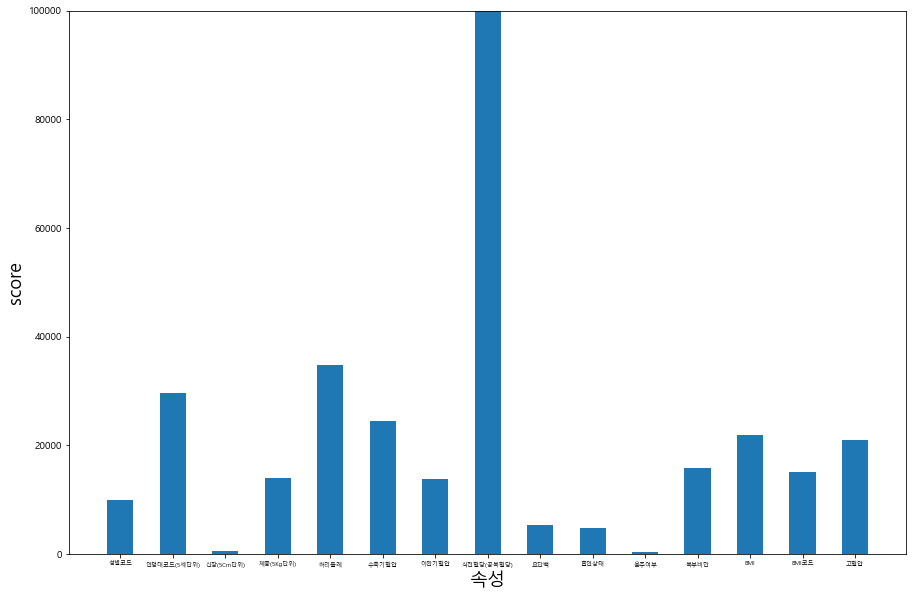

In [223]:
#분산분석(ANOVA) F검정 통계값
#그룹내 분산이 작고 그룹간 분산이 클 경우 값이 커지는 F-value를 이용하여 변수를 선택한다. 각 변수마다 F값을 구해 F값이 큰 변수를 기준으로 변수를 선택하는 방법
from sklearn.feature_selection import SelectKBest, f_classif

array = df.values
X = array[:,0:15]
Y = array[:,15]

selectK = SelectKBest(score_func=f_classif, k='all')
selectK.fit(X,Y)
selectK.scores_

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '복부비만', 'BMI', 'BMI코드',
       '고혈압'])
index = np.arange(len(label))


plt.bar(index, selectK.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.ylim(0, 100000)
plt.show()


[0.007 0.052 0.015 0.016 0.072 0.06  0.066 0.643 0.008 0.009 0.005 0.008
 0.021 0.006 0.012]


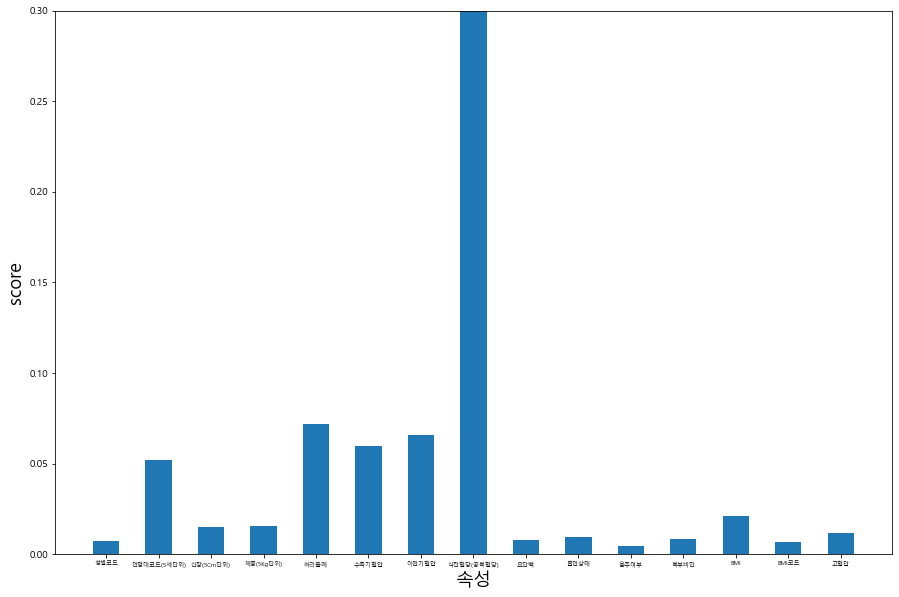

In [220]:
#트리 기반 모델(또는 선형모델)들이 특성 중요도(Feature Importance)를 제공하는 것에 기반한 방법
#특성 중요도는 예측의 불확실성을 낮출수록 증가하므로, (X,y)를 트리 기반 모델에 학습시킨 뒤, 특성 중요도가 기준치보다 높은 특성을 선택
from sklearn.ensemble import ExtraTreesClassifier

array = df.values
X = array[:,0:15]
Y = array[:,15]

etc_model = ExtraTreesClassifier()
etc_model.fit(X, Y)

print(etc_model.feature_importances_)

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '복부비만', 'BMI', 'BMI코드',
       '고혈압'])
index = np.arange(len(label))


plt.bar(index, etc_model.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.ylim(0, 0.3)
plt.xticks(index, label, fontsize=6)
plt.show()

In [230]:
#랜덤 포레스트도 특성 중요도
from sklearn.ensemble import RandomForestClassifier


array = df.values
X = array[:,0:15]
Y = array[:,15]


forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X,Y)


print("특성 중요도 : \n{}".format(forest.feature_importances_))



특성 중요도 : 
[0.001 0.014 0.001 0.003 0.012 0.007 0.004 0.94  0.002 0.001 0.001 0.002
 0.004 0.002 0.006]


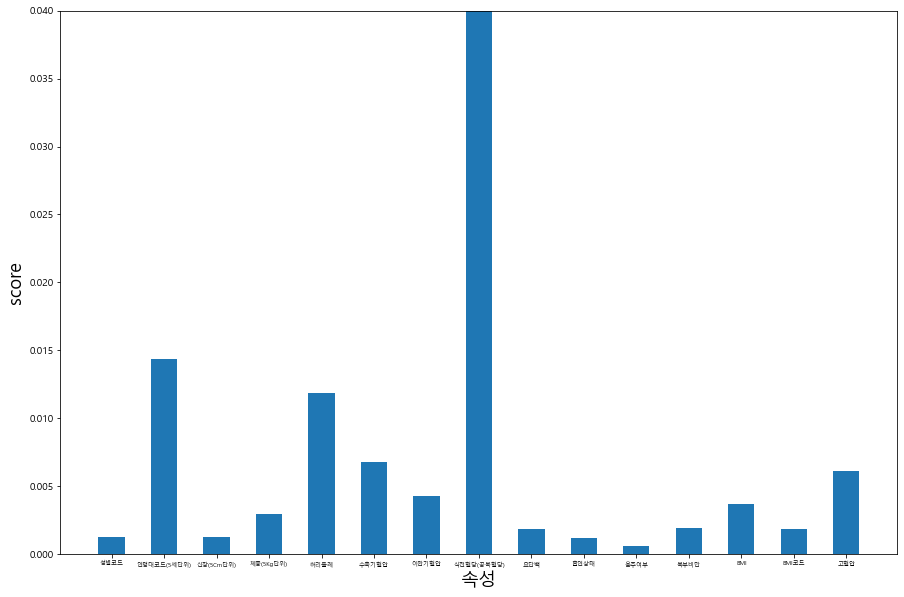

In [235]:
label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '복부비만', 'BMI', 'BMI코드',
       '고혈압'])
index = np.arange(len(label))


plt.bar(index, forest.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.ylim(0,0.04)
plt.xticks(index, label, fontsize=6)
plt.show()